**EDA - Facebook Dataset**

Exploratory data analysis using Python, Numpy, Pandas, Seaborn

*Table of Contents*


1.  Problem Statement
2.  Data Loading and Description
3.  Data Profiling
4.  Understanding the Dataset
5.  Profiling_1
6.  Preprocessing_1
7.  Profiling_2
8.  Preprocessing_2
9.  Post Profiling
10. Conclusions


**1. Problem Statment**

To understand Facebook user behavoir on likes, friend requests made, tenure, usage of Facebook on different devices etc.

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :

Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes

**2. Data Loading and Description**

```
The dataset consists information collected from Facebook for study/practice purpose.
The dataset comprises of 99003 observations of 15 columns. 
```


In [0]:
#All important package Installations

# Install and update plotly using this command to the latest version (higher than version 4.0.0)
!pip install plotly --upgrade

# Install chart_studio, please use this command. 
!pip install chart-studio

# Installing pandas profiling 
!pip install pandas-profiling --upgrade

In [0]:
#All important imports for the Project
import numpy as np                     
import pandas as pd
import seaborn as sbrn
import matplotlib.pyplot as plot
import warnings
import pandas_profiling 

# Few plotly specific imports which are necessary to use plotly offline without signing in to their website.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [0]:
#Basic Settings 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
sbrn.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [0]:
#Fetching the Facebook Dataset given by INSAID at a github repository
df= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
df.head()  #To view the 1st 5 lines of dataframe

In [0]:
#To get a concise summary of a DataFrame to get an idea on number of rows present ,data type of coloumns and memory usage
df.info()

In [0]:
#To get a descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

**3. Data Pre-Profiling**

Pre-profiling the data to understand the quality of data we have, the null values, duplicate , mean etc of different coloumns. 

In [0]:
#Now lets do a Preprofiling of the data using the pandas_profiling . Make sure you have ran the import pandas_profiling before the next command 
df.profile_report(title='Pre-profiling of Facebook data', style={'full_width':True})

**4. Understanding the Dataset**

Observations which are made after pre-profiling are :
1. Gender has Male,Female and NA values - NA values either can be changed to Male based on mode or can be ignored as 175 NA records amounts to only 0.17%  out of total records.
2. Tenure is having 2 null values which can be ignored as its negligible with respect to the total no. of records
3. likes_received is highly skewed
4. mobile_likes_received is highly correlated with likes_received which is 0.97 
5. www_likes_received is highly correlated with likes_received which is 0.94 
6. friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,
   www_likes_received have some zeros as value but its a valid value since the number of likes given or recieved can    be zero.
7. Outliers - likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received have
   outliers
8. userid is always unique thus we can assume that Facebook is having roboust mechanism to differenciate each    
   Facebook profile. And thus userid can be used as a primary key for DB related queries.

In [0]:
df[df['dob_day']==1]['dob_day'].count()/df[df['dob_day']==2]['dob_day'].count()

***Univariate Plotting***

Checking the number of times a birth day is present -
From the below graph we can understand that users having day of birth on 1st of any month is > 200% than the day of birth on any other day of the month. This is highly unlikely scenario and thus it can be inferred that :
1. Users randomly enter the day of the birth as 1st. 
2. Users are creating fake accounts.
3. Users dont want to reveal their actual DOB.


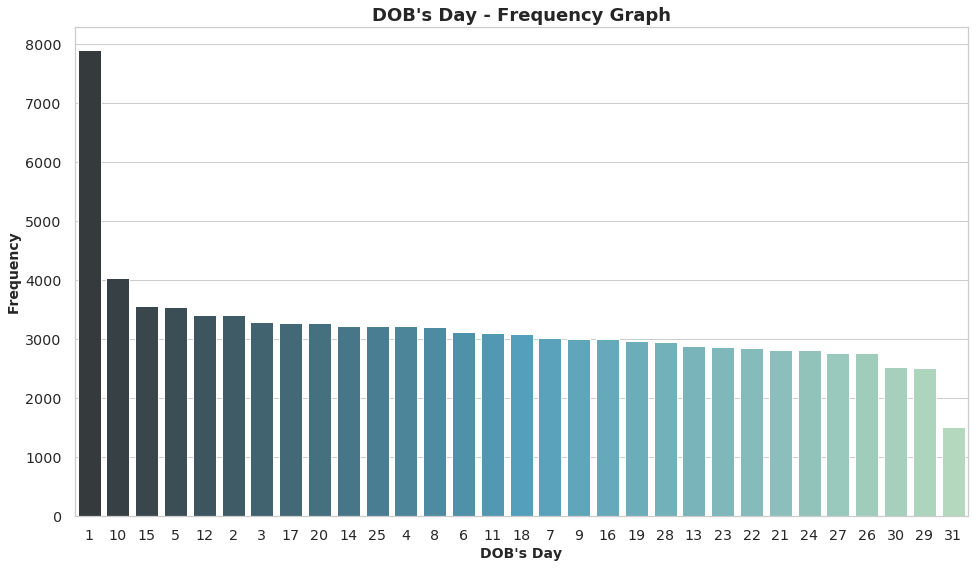

In [14]:
plot.figure(figsize=(16,9))  #To define the size of the graph
sbrn.countplot('dob_day',data = df, order = df['dob_day'].value_counts().index,palette="GnBu_d")
plot.title("DOB's Day - Frequency Graph",fontsize=18,fontweight="bold") #Title Heading
plot.xlabel('DOB\'s Day',fontsize=14,fontweight="bold") #X-Axis label
plot.ylabel('Frequency',fontsize=14,fontweight="bold")  #Y-Axis label
plot.show() #To Display the plotted graph

**5. Preprocessing the data**

Cleaning the data : Removing the Null values.

For Category data we can use Mode.

For Numerical data we can use Mean or Median.

In [0]:
#Now Starting with checking of coloumns which have missing/Null values. First will be gender
df[df['gender'].isnull()].count() #175 entries of gender are NAN: It can be considered Transgender.

In [0]:
# But it will not add any insight to our analysis. So since the ratio of 175/99903 is very low, we will allocate the NAN values to the mode.
df['gender']=df['gender'].fillna(df['gender'].dropna().mode()[0]) # Filling the missing gender values with the mode value ie. Male 
df[df['gender'].isnull()].count()  #Checking after updating the missing values if any thing is left as Null.

In [0]:
#Similarly adding median to the tenure missing values as tenure is numeric in nature.
df['tenure']=df['tenure'].fillna(df['tenure'].dropna().median()) # Filling the missing tenure values with the median values
df[df['tenure'].isnull()].count()  #Checking after updating the missing values if any thing is left as Null.

In [0]:
#Checking the skewness in tenure. 
df[df['tenure']== df['tenure'].max()] #Getting the list of all rows when tenure is highest

In [0]:
#Checking probable Fake or InActive Facebook profiles by getting the values of those rows where profile is actiavted for more than a year with no Friend Request and No likes made
dropInd=df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].index  # To find the Rows where tenure>365, likes==0 && friendships_initiated==0
df.drop(dropInd,0,inplace=True) # Deleting the indexes
df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].count()  # Print To Check if the unrequired rows are now deleted

**6. Data Post-Profiling**

After removing redundant data, cleaning null values from each coloumn and removing skwedness running profiling again 

In [40]:
#Post profiling of Data.
df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

In [41]:
#To get a concise summary of a DataFrame to get an idea on number of rows present ,data type of coloumns and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98201 entries, 0 to 99002
Data columns (total 15 columns):
userid                   98201 non-null int64
age                      98201 non-null int64
dob_day                  98201 non-null int64
dob_year                 98201 non-null int64
dob_month                98201 non-null int64
gender                   98201 non-null object
tenure                   98201 non-null float64
friend_count             98201 non-null int64
friendships_initiated    98201 non-null int64
likes                    98201 non-null int64
likes_received           98201 non-null int64
mobile_likes             98201 non-null int64
mobile_likes_received    98201 non-null int64
www_likes                98201 non-null int64
www_likes_received       98201 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 12.0+ MB


In [43]:
#To get a descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

userid           age       dob_day      dob_year     dob_month  \
count  9.820100e+04  98201.000000  98201.000000  98201.000000  98201.000000   
mean   1.597058e+06  37.292349     14.538426     1975.707651   6.286830       
std    3.441102e+05  22.640850     9.013913      22.640850     3.528375       
min    1.000008e+06  13.000000     1.000000      1900.000000   1.000000       
25%    1.298835e+06  20.000000     7.000000      1963.000000   3.000000       
50%    1.596169e+06  28.000000     14.000000     1985.000000   6.000000       
75%    1.895857e+06  50.000000     22.000000     1993.000000   9.000000       
max    2.193542e+06  113.000000    31.000000     2000.000000   12.000000      

             tenure  friend_count  friendships_initiated         likes  \
count  98201.000000  98201.000000  98201.000000           98201.000000   
mean   537.330811    197.937404    108.330027             157.353469     
std    458.890754    388.482294    189.305368             574.438279     
min    0.000000      0.000000      0.000000               0.000000       
25%    225.000000    32.000000     17.000000              1.000000       
50%    410.000000    83.000000     47.000000              11.000000      
75%    675.000000    207.000000    118.000000             83.000000      
max    3139.000000   4923.000000   4144.000000            25111.000000   

       likes_received  mobile_likes  mobile_likes_received     www_likes  \
count  98201.000000    98201.000000  98201.000000           98201.000000   
mean   143.852761      106.982943    84.806641              50.370465      
std    1393.515701     446.963773    843.277698             286.688023     
min    0.000000        0.000000      0.000000               0.000000       
25%    1.000000        0.000000      0.000000               0.000000       
50%    9.000000        4.000000      5.000000               0.000000       
75%    60.000000       47.000000     34.000000              7.000000       
max    261197.000000   25111.000000  138561.000000          14865.000000   

       www_likes_received  
count  98201.000000        
mean   59.046079           
std    603.843944          
min    0.000000            
25%    0.000000            
50%    2.000000            
75%    20.000000           
max    129953.000000

**7. Data Analysis and Visualisation**

Data visualization is a general term to describes efforts to help people understand the significance of data by placing it in a visual context. Patterns, trends and correlations that might go undetected in text-based data can be exposed and recognized easier with data visualization (ie. Graphs, Corelation, Bar-Charts, Histogram etc)

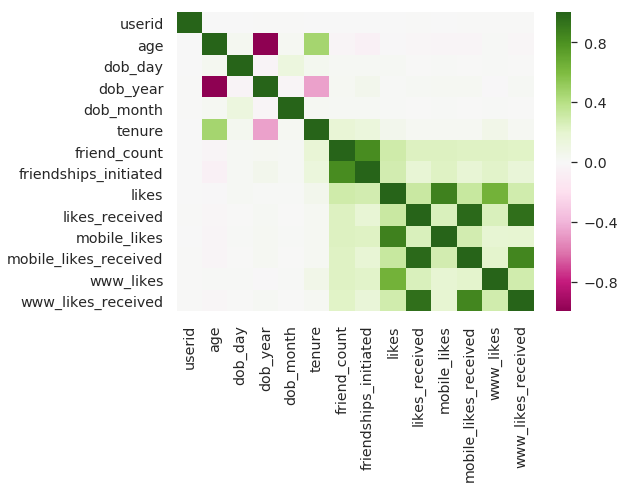

In [56]:
#Compute pairwise correlation of columns, excluding NA/null values.
corr=df.corr() 
#Make a corelation graph out of the correlation we get from above statment using Seaborn package
sbrn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        cmap="PiYG")

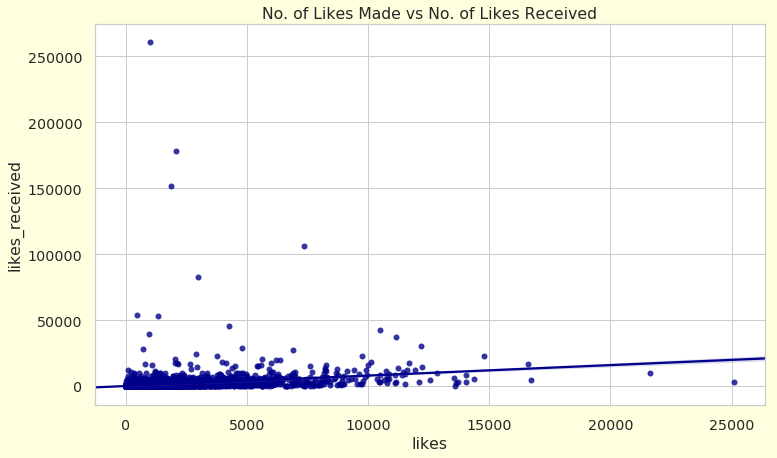

In [80]:
#Find Corellation Between Likes & Likes Received: Very Low Corellation
plot.figure(figsize=(12,7), facecolor='lightyellow')
plot.title('No. of Likes Made vs No. of Likes Received')
sbrn.regplot(data=df, x='likes', y='likes_received', color='darkblue')
#sbrn.heatmap(df.corr(), cmap='BuGn')
#sbrn.pairplot(df, vars=["likes", "www_likes"])

[Text(0, 0.5, 'Browser and Mobile Likes'), Text(0.5, 0, 'Likes')]

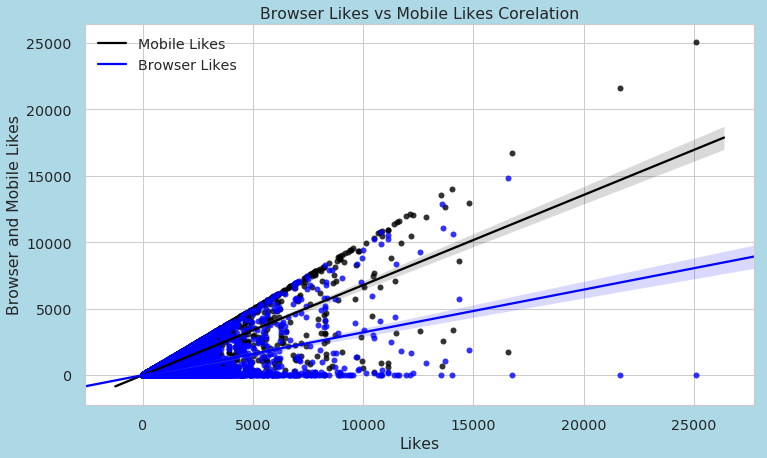

In [99]:
#Find Corellation Between Likes Made via webportal & Likes Made via Mobile
plot.figure(figsize=(12,7), facecolor='lightblue')
plot.title('Browser Likes vs Mobile Likes Corelation')
sbrn.regplot(data=df, x='likes', y='mobile_likes', color='black')
fig = sbrn.regplot(data=df, x='likes', y='www_likes', color='blue')
plot.legend(labels=('Mobile Likes','Browser Likes'))
fig.set(xlabel = "Likes", ylabel = "Browser and Mobile Likes")
#Correllation between Likes vs  Likes by Mobile / Likes by Browser: High Corellation. Mobile Likes are highly correlated to likes as compared to the Browser Likes.

[Text(0, 0.5, 'Likes Received via Browser and Mobile'),
 Text(0.5, 0, 'Likes Received')]

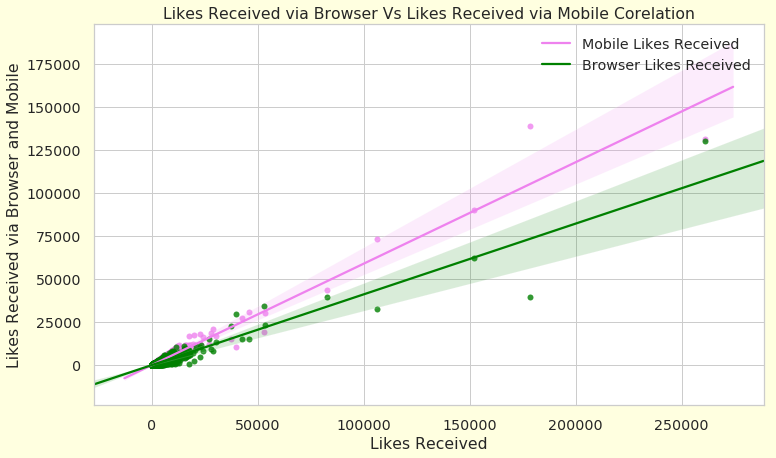

In [98]:
#Find Corellation Between Likes Received via webportal & Likes Recevied via Mobile
plot.figure(figsize=(12,7),facecolor='lightyellow')
plot.title('Likes Received via Browser Vs Likes Received via Mobile Corelation')
sbrn.regplot(data=df, x='likes_received', y='mobile_likes_received', color='violet')
fig = sbrn.regplot(data=df, x='likes_received', y='www_likes_received', color='green')
plot.legend(labels=('Mobile Likes Received','Browser Likes Received'))
fig.set(xlabel = "Likes Received", ylabel = "Likes Received via Browser and Mobile")
#Correllation between Likes Received vs Mobile Likes Received/Browser Likes Received:Very High Corellation. 
#Mobile Likes Received are very highly correlated to likes received as compared to the Browser Likes Reveived which show high correllation with Likes Received..

[Text(0, 0.5, 'Number of Users'), Text(0.5, 0, 'Age Group')]

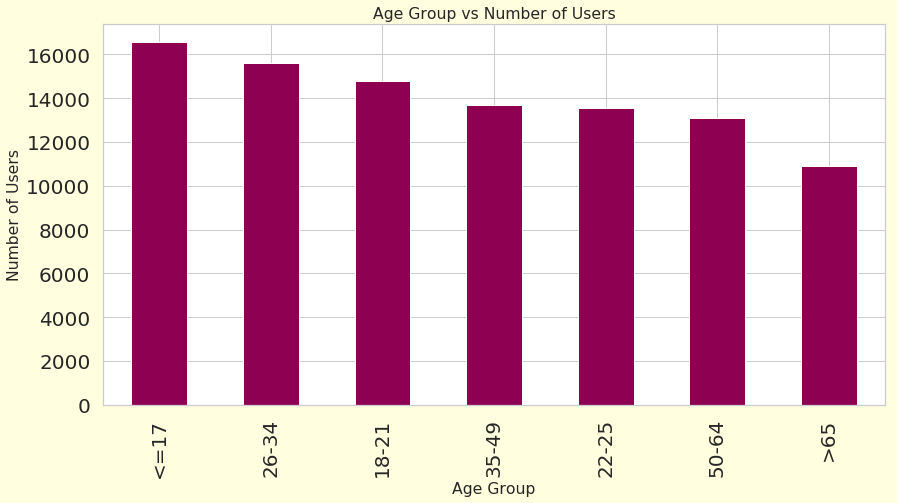

In [132]:
#Deriving Relation between Age groups Vs Number of Users
#Grouping the Ages in age group starting from 13 as its the minimum nunber of Age that have joined Facebook
df['age_group']= pd.cut(df['age'].dropna(),[13,18,22,26,35,50,65,113],labels=['<=17','18-21','22-25','26-34','35-49','50-64','>65'],include_lowest=True)
#Distributing the continuous data into different age groups
plot.figure(figsize=(12,7),facecolor='lightyellow')
plot.title('Age Group vs Number of Users')
fig = df['age_group'].value_counts().plot(kind='bar',  figsize=(14,7),fontsize=20,  colormap='PiYG') #BarChart as the visualistaion if for 2 coloumns of data. 
fig.set(xlabel = "Age Group", ylabel = "Number of Users")
#Maximum Users are from age Group <= 17.

[Text(0, 0.5, 'Number of Friends'), Text(0.5, 0, 'Age Group')]

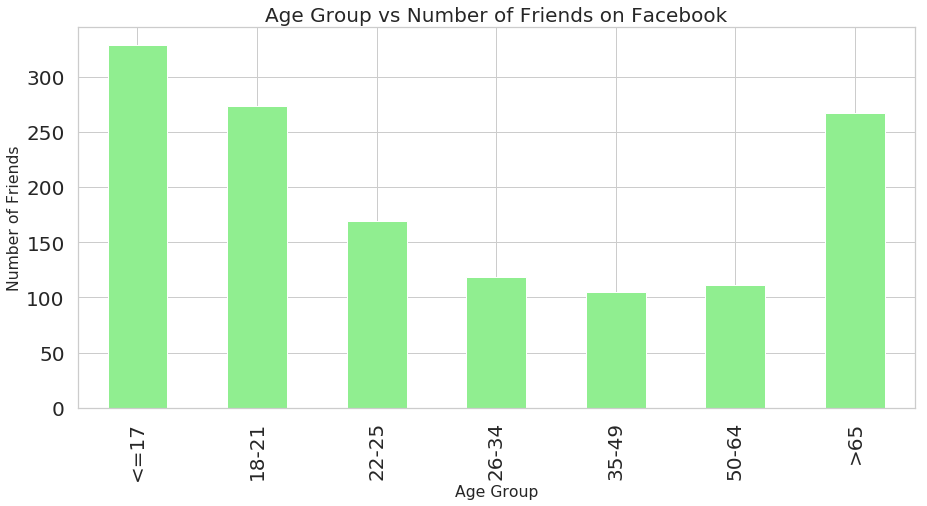

In [137]:
#Deriving Relation between Age groups Vs Number of Users
plot.title('Age Group vs Number of Friends on Facebook', fontsize=20)
fig = df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 7), color='lightgreen', fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Number of Friends")
#Plotting a graph for Friend Count with respect to Age Groups

[Text(0, 0.5, 'Likes Made & Likes Recieved'), Text(0.5, 0, 'Age Group')]

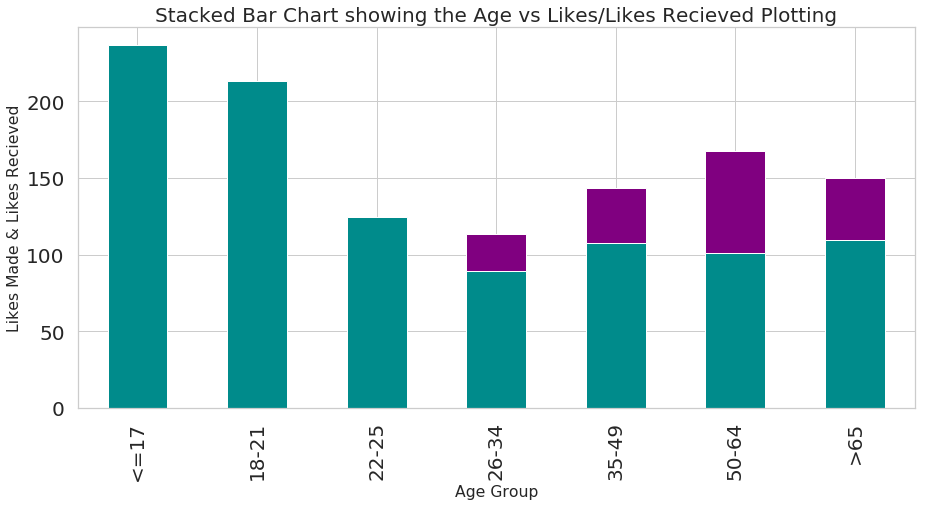

In [142]:
#Plotting Likes & Likes Received with reference to age group
#Treand shows the users from Age Group till 25 receives more like where as users from age group 26 onwards hit more likes than received.
plot.title('Stacked Bar Chart showing the Age vs Likes/Likes Recieved Plotting',fontsize=20)
plot.legend(labels=('Likes','Likes Received'),fontsize=20)
df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 7), color='purple',fontsize=20)
fig = df.groupby(['age_group'])['likes_received'].mean().plot(kind='bar', figsize=(15, 7), color='darkcyan',fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Likes Made & Likes Recieved")

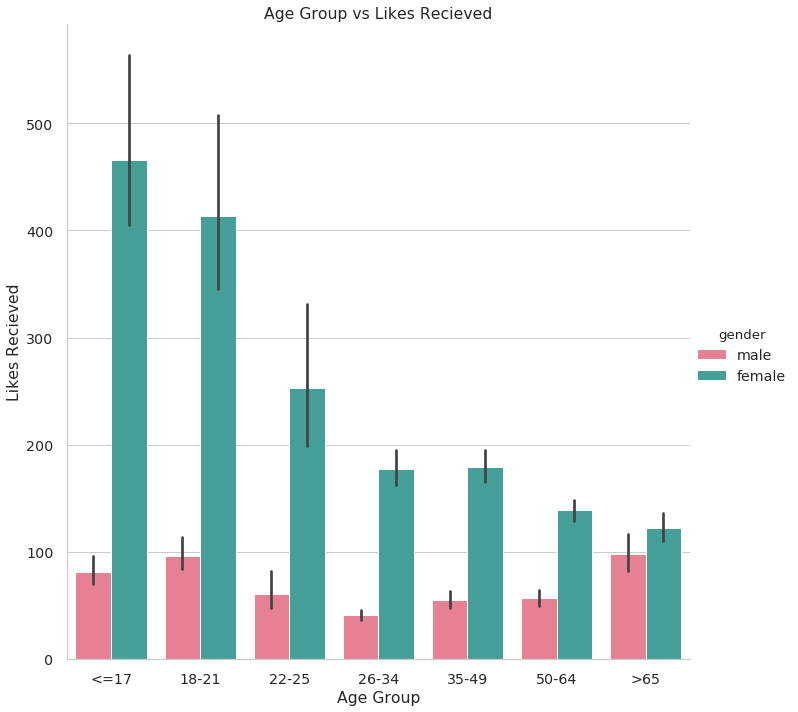

In [160]:
# Females in all the age groups gets more like however in the agr from 13-16, 16-24, they have the most likes received.
#plot.title('',fontsize=20)
fig = sbrn.catplot(x='age_group', y='likes_received', hue='gender', data=df,  height=10, kind='bar', palette='husl' )
fig.set(xlabel = "Age Group", ylabel = "Likes Recieved")
fig.set(title = "Age Group vs Likes Recieved")

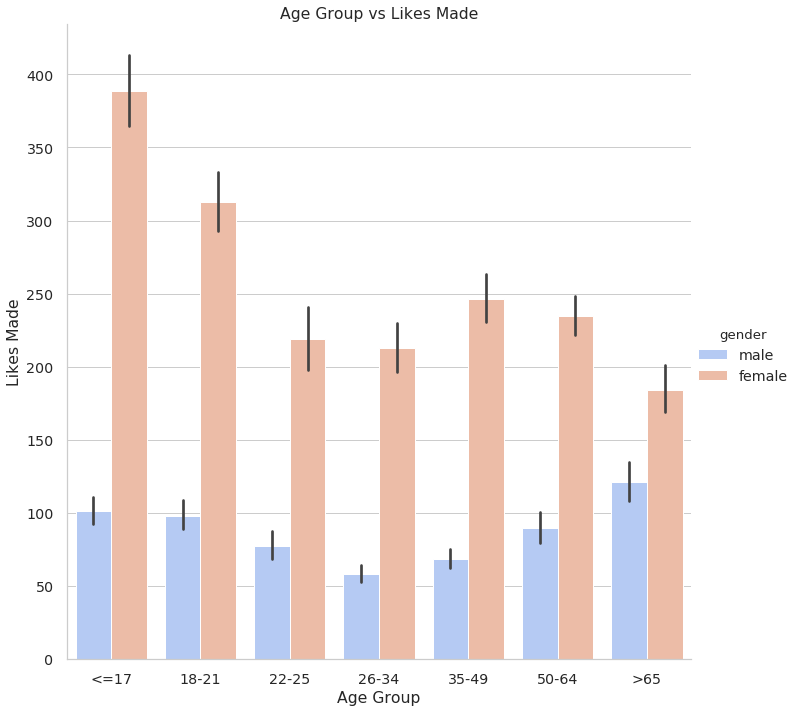

In [158]:
# Females in all the age groups gets more like however in the agr from 13-16, 16-24, they have the most likes received.
fig = sbrn.catplot(x='age_group', y='likes', hue='gender', data=df,  height=10, kind='bar', palette='coolwarm')
fig.set(xlabel = "Age Group", ylabel = "Likes Made")
fig.set(title = "Age Group vs Likes Made")

[Text(0.5, 1.0, 'Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting')]

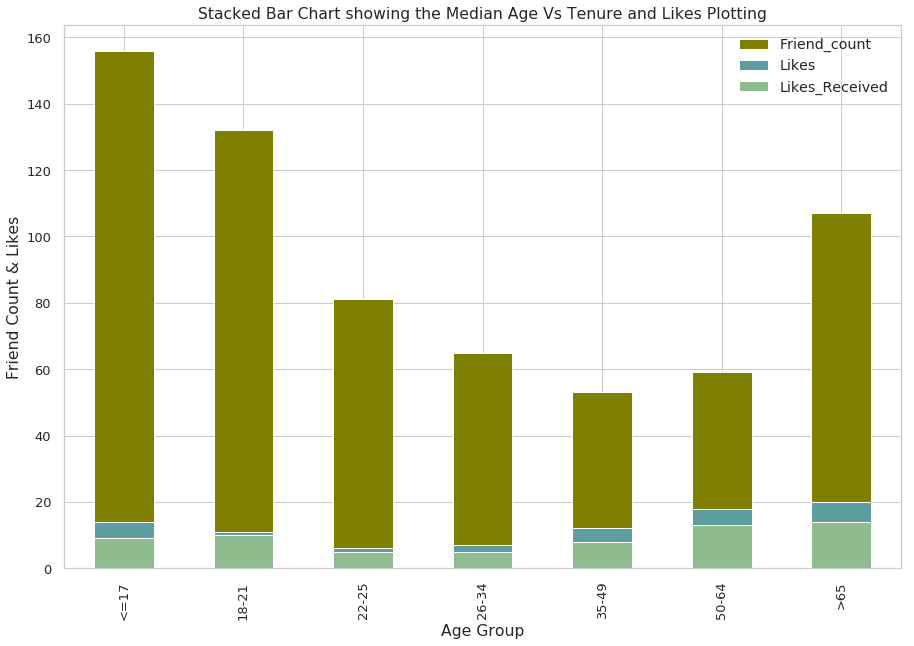

In [166]:
#More the freind count more the likes hit by a user. However likes received depends on other factors apart from friend count as well.
df.groupby(['age_group'])['friend_count'].median().plot(kind='bar', figsize=(15, 10), color='olive')
df.groupby(['age_group'])['likes'].median().plot(kind='bar', figsize=(15, 10), color='cadetblue', fontsize=13)
fig = df.groupby(['age_group'])['likes_received'].median().plot(kind='bar', figsize=(15, 10), color='darkseagreen', fontsize=13)
plot.legend(labels=( 'Friend_count', 'Likes','Likes_Received'))
fig.set(xlabel = "Age Group", ylabel = "Friend Count & Likes")
fig.set(title = "Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting")

[Text(0, 0.5, 'Tenure & Likes'), Text(0.5, 0, 'Age Group')]

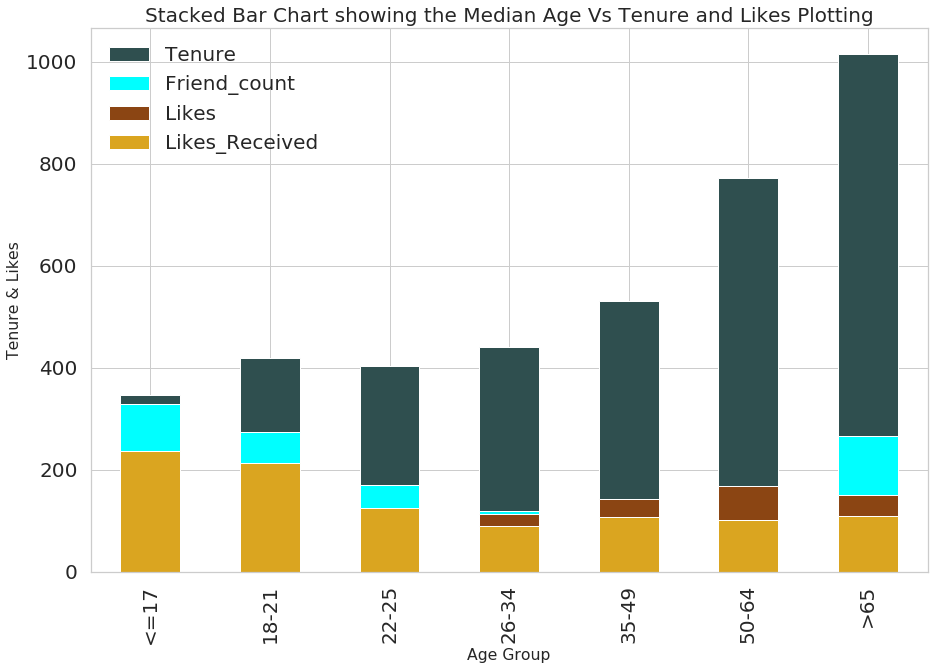

In [178]:
#Plot to find a relation between Tenure, Freind Count, Likes and Likes Received.
#Older age group users have more tenure at FB.
#More the Friend Count the users have, more the likes hits by the users.
#Young age Group users get more likes.
#Old Age Group users hits morelikes.
plot.title('Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting',fontsize=20)
df.groupby(['age_group'])['tenure'].mean().plot(kind='bar', figsize=(15, 10), color='darkslategrey',fontsize=20)
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 10), color='aqua',fontsize=20)
df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 10), color='saddlebrown', fontsize=20)
fig = df.groupby(['age_group'])['likes_received'].mean().plot(kind='bar', figsize=(15, 10), color='goldenrod', fontsize=20)
plot.legend(labels=('Tenure', 'Friend_count', 'Likes','Likes_Received'),fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Tenure & Likes")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age Group')]

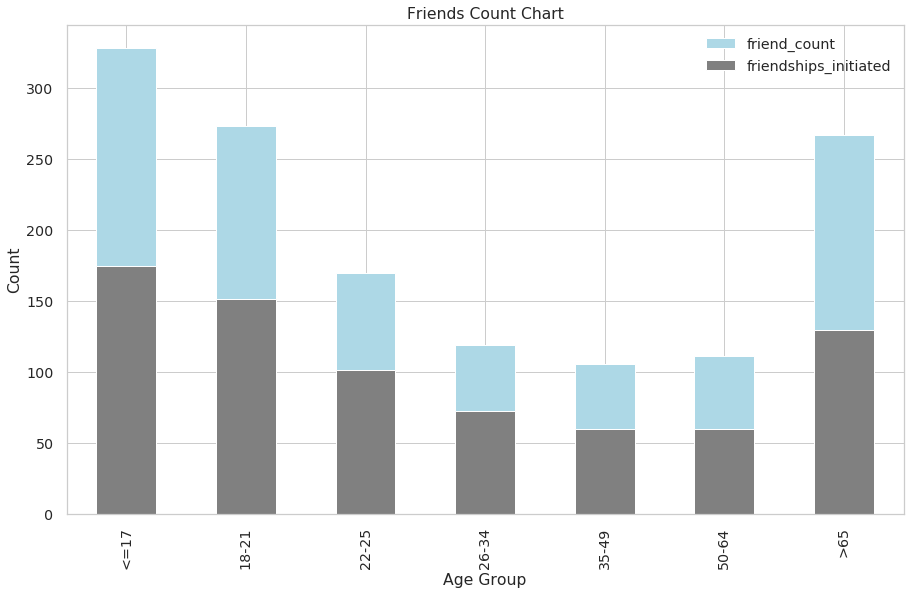

In [181]:
#Frinedship initiated and requet recieved are almost equally distributed
plot.title('Friends Count Chart')
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='lightblue')
fig = df.groupby(['age_group'])['friendships_initiated'].mean().plot(kind='bar', figsize=(15, 9), color='grey')
plot.legend(labels=('friend_count','friendships_initiated'))
fig.set(xlabel = "Age Group", ylabel = "Count")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age Group')]

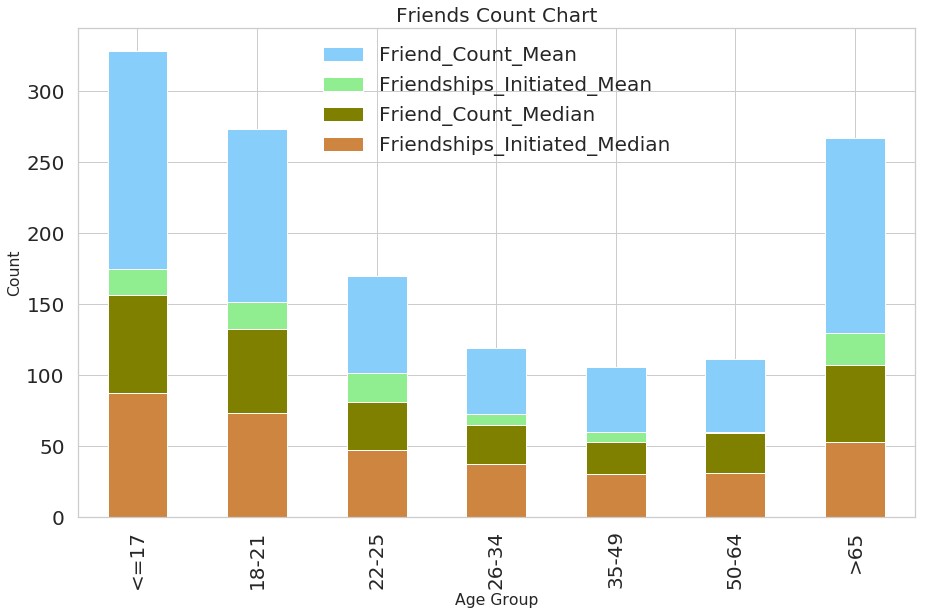

In [185]:
#Frinedship initiated and requet recieved are equally distributed
plot.title('Friends Count Chart',fontsize=20)
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='lightskyblue',fontsize=20)
df.groupby(['age_group'])['friendships_initiated'].mean().plot(kind='bar', figsize=(15, 9), color='lightgreen',fontsize=20)
df.groupby(['age_group'])['friend_count'].median().plot(kind='bar', figsize=(30, 14), color='olive',fontsize=20)
fig = df.groupby(['age_group'])['friendships_initiated'].median().plot(kind='bar', figsize=(15, 9), color='peru',fontsize=20)
plot.legend(labels=('Friend_Count_Mean','Friendships_Initiated_Mean','Friend_Count_Median','Friendships_Initiated_Median'),fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Count")
#More than 200 percent of difference between mean and median for freind_count and friendships_initiates shows high skewness in the data.

[Text(0, 0.5, 'Number of Friends'), Text(0.5, 0, 'Age Group')]

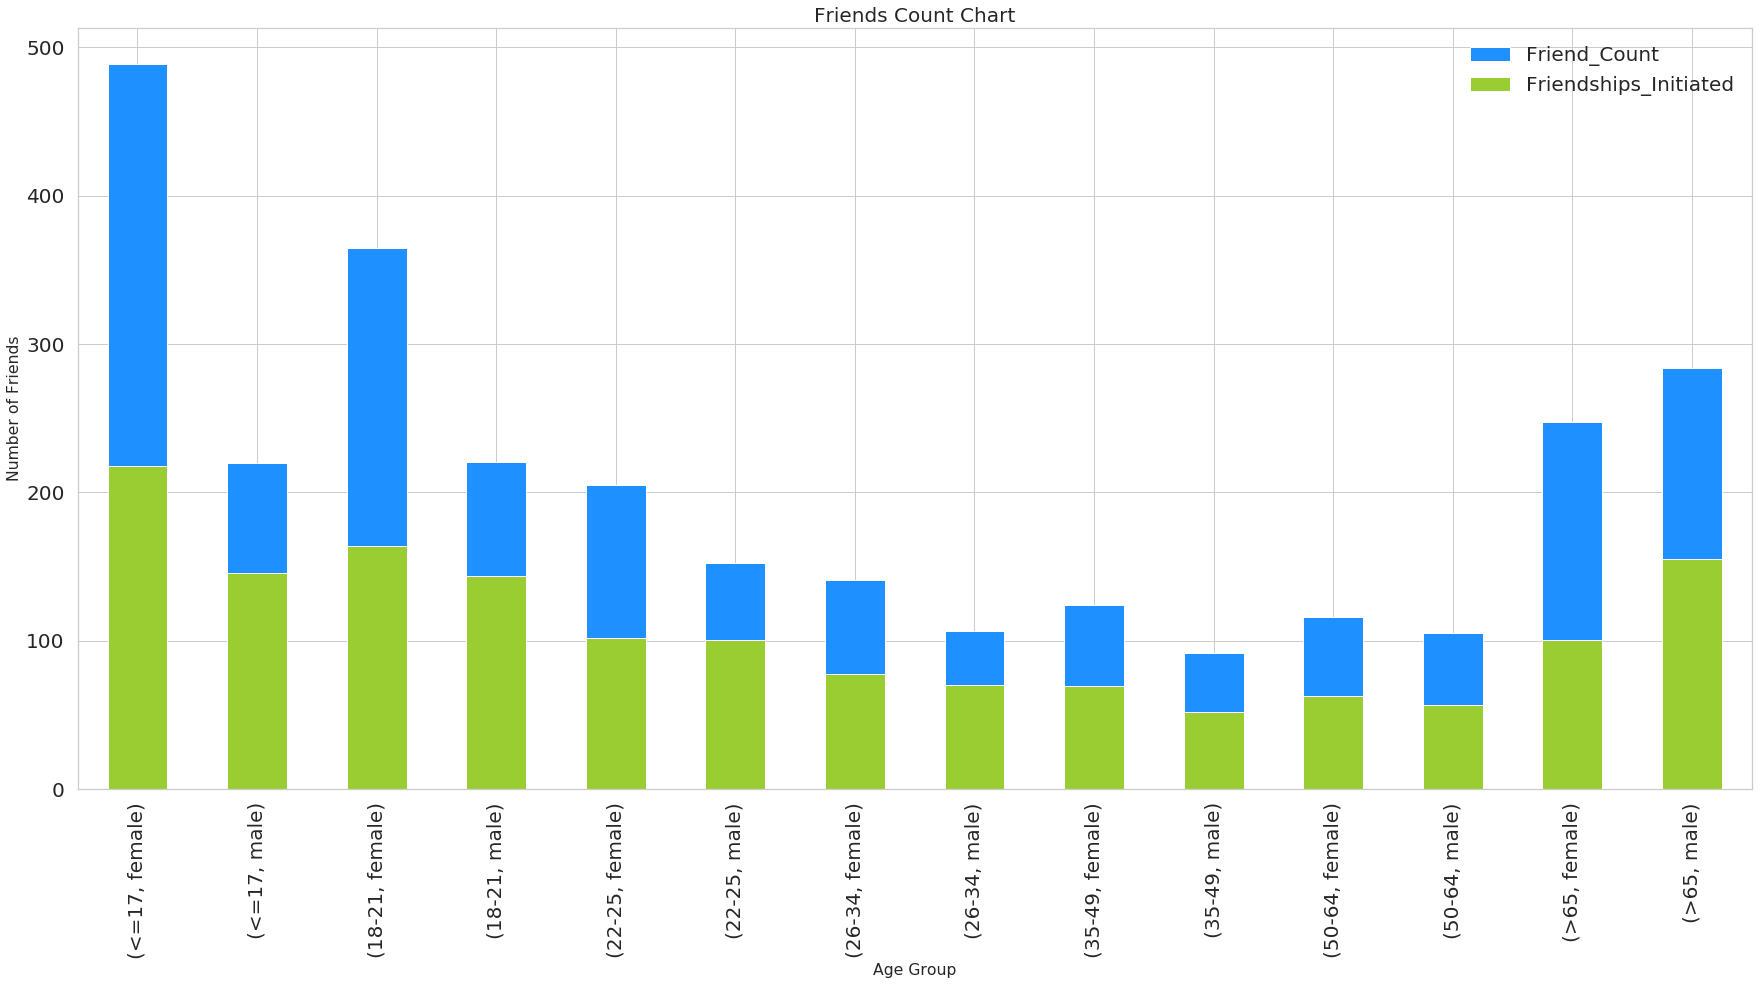

In [187]:
 #Frinedship initiated and requet recieved are equally distributed
 #Females have high freind count and freindships initiated/ requests received compared to males.
 #Older age group users have more freind counts/ freindship Initiated/ friendship received for males than femaless.
plot.title('Friends Count Chart',fontsize=20)
df.groupby(['age_group','gender'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='dodgerblue', fontsize=20)
fig = df.groupby(['age_group','gender'])['friendships_initiated'].mean().plot(kind='bar', figsize=(30, 14), color='yellowgreen',fontsize=20)
plot.legend(labels=('Friend_Count','Friendships_Initiated'),fontsize=20)   
fig.set(xlabel = "Age Group", ylabel = "Number of Friends")



[Text(0, 0.5, 'Likes'), Text(0.5, 0, 'Age Group, Gender')]

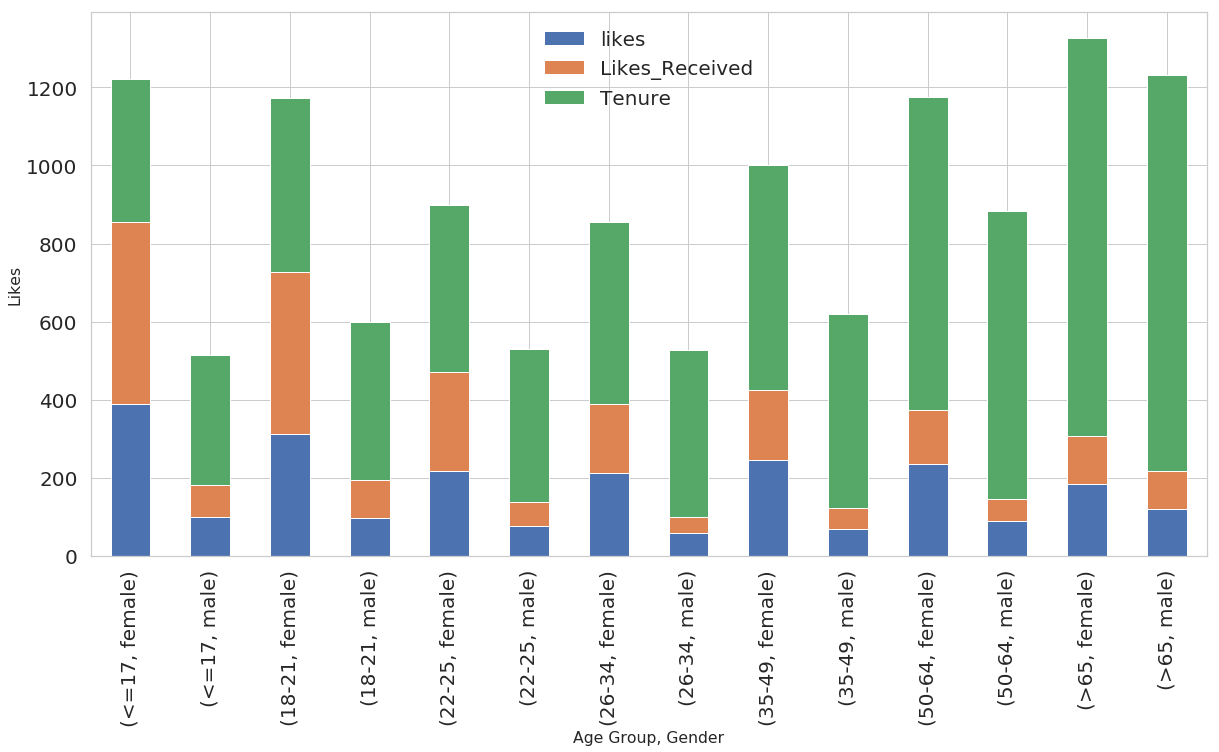

In [189]:
#Female across age-groups have more tenure compared to the males from that age group. The ratio of tenure between males and females across age-groups is as high as 200% till the age group of 21. 
#Hence till the age group of 21,forever 2 females joining facebook a male joins facebook.
# For each age group the likes recieved and the likes are more for females compared to the males.
#The ratio between male & female likes/likes received is almost 180 % in the younger age groups however it gradually decreases to 105%.
fig = df.groupby(['age_group','gender'])[['likes','likes_received','tenure']].mean().plot(kind='bar', figsize= (20,10) ,stacked=True,fontsize=20)
plot.legend(labels=('likes','Likes_Received', 'Tenure'), fontsize=20)
fig.set(xlabel = "Age Group, Gender", ylabel = "Likes")

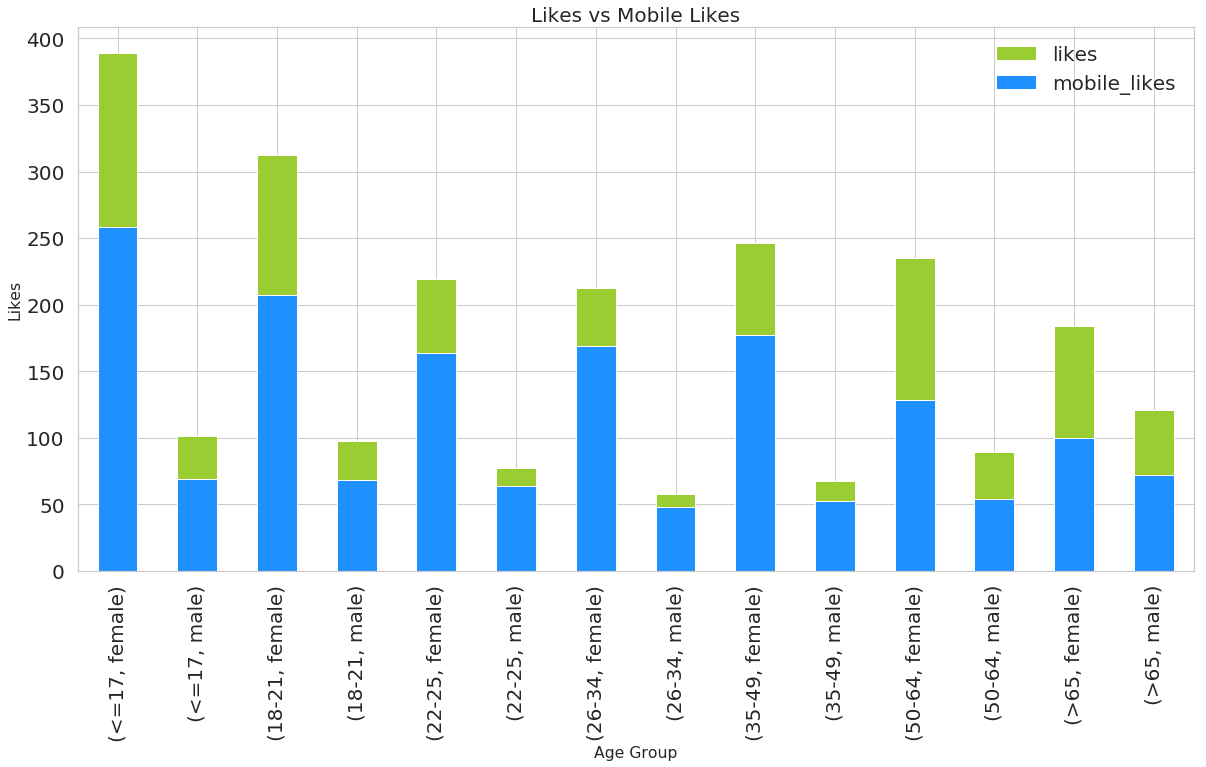

In [191]:
#Plotting of Likes and Mobile Likes w.r.t. Age_Goup and Gender.
#Females users from the age range 17-21 have the highest likes
#Females across age group are more active on FB.
#All the users show a tendency to use FB over mobile.
#The users in the age range 22-49 have the least likes and majority of then is from Mobiles. Hence it shows they use the application very less. And they tend to use it when they have free time. This category of users are either working professionals or involved in higher studies.
#Users with the age range > 50 use both the Mobile as well as Web Brwser.
#This indicates that they are reteired or have morefree time as compared to the young age group users.
plot.title('Likes vs Mobile Likes',fontsize=20)
df.groupby(['age_group','gender'])['likes'].mean().plot(kind='bar', figsize=(20, 10), color='yellowgreen',fontsize=20)
fig = df.groupby(['age_group','gender'])['mobile_likes'].mean().plot(kind='bar', figsize=(20,10), color='dodgerblue',fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Likes")
plot.legend(labels=('likes','mobile_likes'),fontsize=20)

[Text(0, 0.5, 'Likes'), Text(0.5, 0, 'Age Group')]

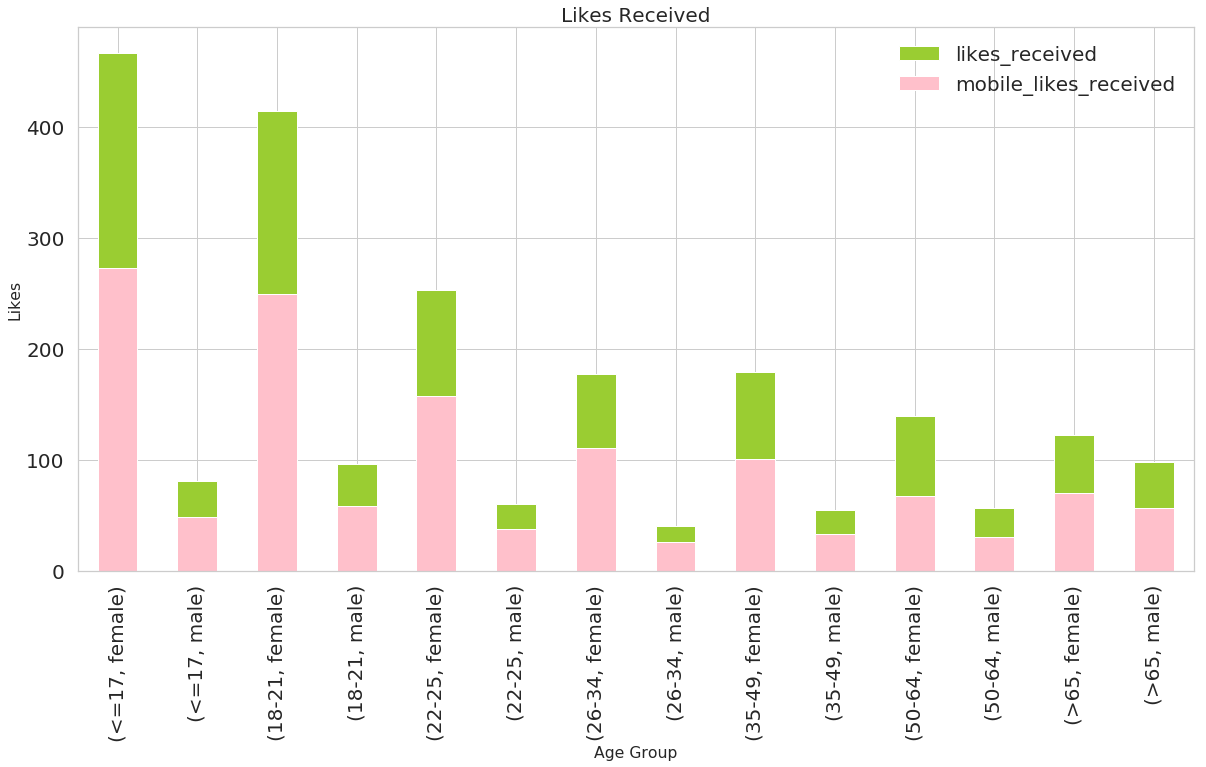

In [193]:
#Femlae Users gets more likes than male users in across every age group. Mobile like received holds the edge across all the age groups.
 #Female users in the age range 17-21 gets the most likes. Mobile and Browser likes are equally distributed. This means they get likes from around all the age groups users.
#Users from agegroup 21-49 have very low likes received: It indicated they are less active on FB and posts very less.
#User from age group 50-64 have low likes received. This indicates they do not pull as much attention as compared to the other high likes receiving age groups.
plot.title('Likes Received',fontsize=20)
df.groupby(['age_group','gender'])['likes_received'].mean().plot(kind='bar', figsize=(20, 10), color='yellowgreen',fontsize=20)
fig = df.groupby(['age_group','gender'])['mobile_likes_received'].mean().plot(kind='bar', figsize=(20, 10), color='pink',fontsize=20)
plot.legend(labels=('likes_received','mobile_likes_received'),fontsize=20)
fig.set(xlabel = "Age Group", ylabel = "Likes")